In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
data = pd.read_csv('data.csv')
data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [9]:
data.mean()

,0
Duration,63.846154
Pulse,107.461538
Maxpulse,134.047337
Calories,375.790244


In [10]:
data.median()


,0
Duration,60.0
Pulse,105.0
Maxpulse,131.0
Calories,318.6


In [11]:
data.mode()


,Duration,Pulse,Maxpulse,Calories
0,60,100,120,300.0


In [12]:
data.std()


,0
Duration,42.299949
Pulse,14.510259
Maxpulse,16.450434
Calories,266.379919


In [13]:
data.var()


,0
Duration,1789.285714
Pulse,210.547619
Maxpulse,270.616793
Calories,70958.261377


In [14]:
data.isnull().sum()


,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


In [15]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())


In [16]:
data.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,0


In [17]:
result = data[['Duration','Maxpulse']].agg(['min','max','count','mean'])
result

,Duration,Maxpulse
min,15.000000,100.000000
max,300.000000,184.000000
count,169.000000,169.000000
mean,63.846154,134.047337


In [18]:
d1 = data[data['Calories'].between(500,1000)]
d1

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [19]:
d2 = data[(data['Calories']>500) & (data['Pulse']<100)]
d2

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [20]:
data_modified=data.drop('Maxpulse',axis=1)
data_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [21]:
data.drop('Maxpulse',axis=1)

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [22]:
data["Calories"]=data["Calories"].astype(float).astype(int)
data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,145,479
2,60,103,135,340
3,45,109,175,282
4,45,117,148,406
...,...,...,...,...
164,60,105,140,290
165,60,110,145,300
166,60,115,145,310
167,75,120,150,320


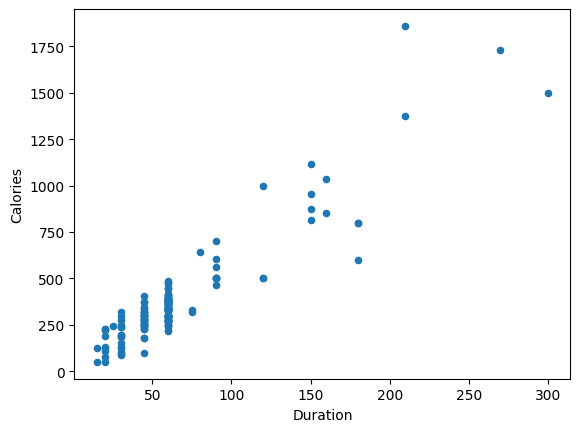

In [23]:
plot = data.plot.scatter(x="Duration",y="Calories")

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
salary_data = pd.read_csv('/content/Salary_Data .csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [26]:
X = salary_data["YearsExperience"]
Y = salary_data["Salary"]
#X1 = [[i,x] for i, x in enumerate(X)]
#Y1 = [[i,y] for i, y in enumerate(Y)]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

In [27]:
regressor = LinearRegression()
model = regressor.fit(X_train.values.reshape(-1, 1),Y_train.values.reshape(-1, 1))

In [28]:
print(model.coef_)
print(model.intercept_)

[[9345.94244312]]
[26816.19224403]


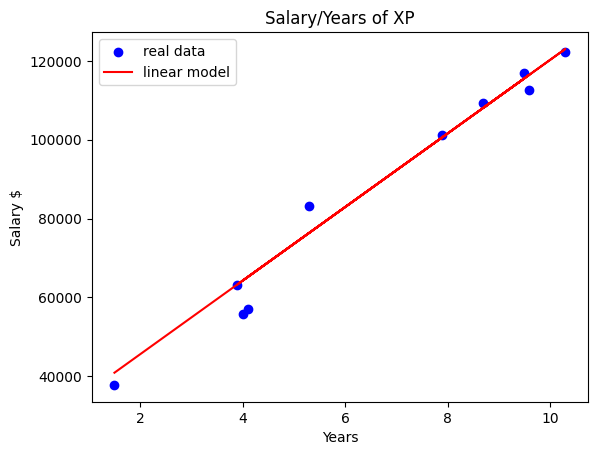

In [29]:
Y_predict = model.predict(X_test.values.reshape(-1,1))
plt.title("Salary/Years of XP")
plt.ylabel("Salary $")
plt.xlabel("Years")
plt.scatter(X_test,Y_test,color="blue",label="real data")
plt.plot(X_test,Y_predict,color="red",label="linear model")
plt.legend()
plt.show()

In [30]:
mean_squared_error(Y_test, Y_predict)

21026037.329511296

In [ ]:
plt.rc('figure', figsize=(10, 8))
plt.style.use('seaborn-white')

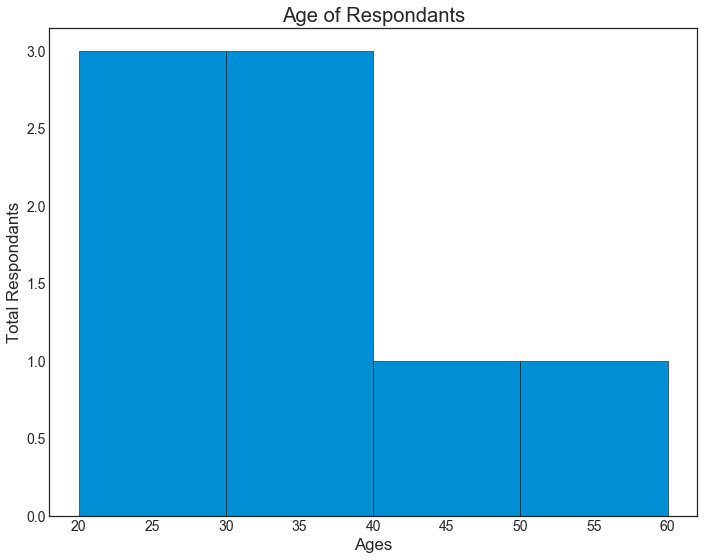

In [ ]:
ages = [18, 18, 21, 25, 26, 30, 32, 38, 45, 55]
bins= [10, 20, 30, 40, 50, 60]

# plt.hist(ages, bins=5, edgecolor='black')
# plt.hist(ages, bins=bins, edgecolor='black')

# excluding data for age 10
plt.hist(ages, bins=bins[1:], edgecolor='black')


plt.title('Age of Respondants')
plt.xlabel('Ages')
plt.ylabel('Total Respondants')
plt.tight_layout()
plt.show()

In [ ]:
plt.style.use('seaborn')
plt.rc('figure', figsize=(10, 8))

In [ ]:
x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

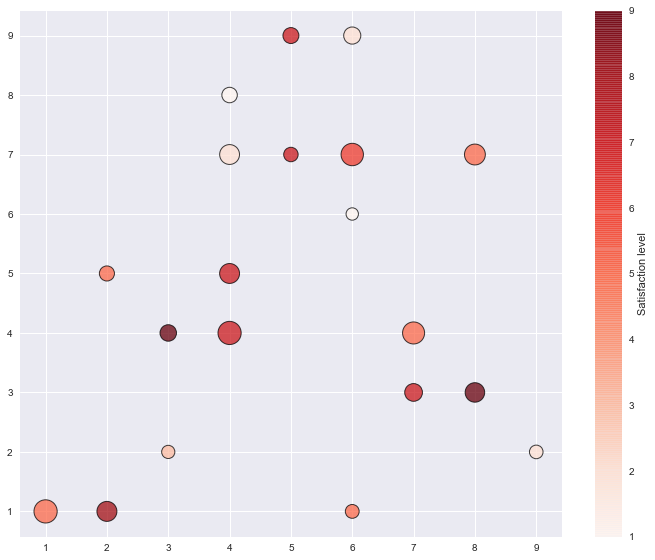

In [ ]:
# color and size on a per mark basis
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174,
         538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]


plt.scatter(x,  y, s=sizes, c=colors, cmap='Reds', edgecolor='black',
            linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Satisfaction level')


plt.tight_layout()

plt.show()

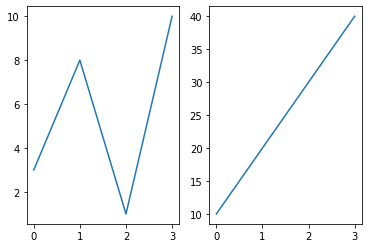

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 2, 2)
plt.plot(x,y)

plt.show()


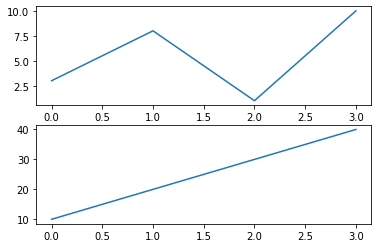

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(2, 1, 1)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(2, 1, 2)
plt.plot(x,y)

plt.show()

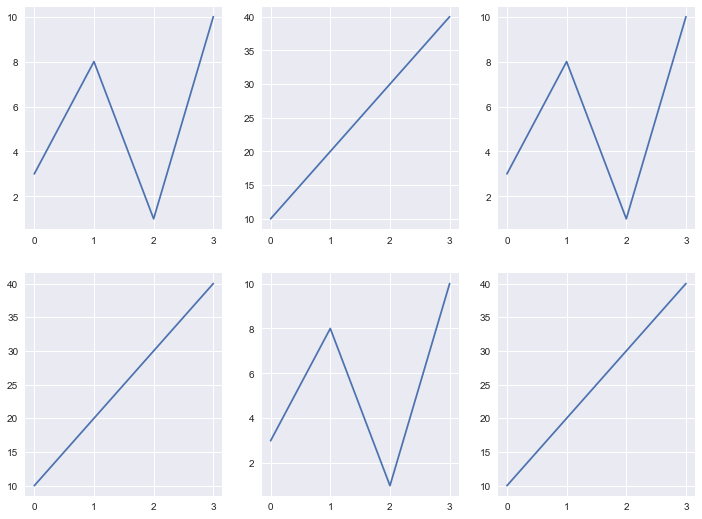

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rc('figure', figsize=(12, 9))

x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(2, 3, 1)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(2, 3, 2)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(2, 3, 3)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(2, 3, 4)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(2, 3, 5)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(2, 3, 6)
plt.plot(x,y)

plt.show()